Algoritmos

In [ ]:
'''
################################################################################
UEFS / PGCC006 – Análise e Projeto de Algoritmos
Prof. João B. Rocha Júnior (PhD in Computer Science, NTNU, Norway)
Marcos Morais de Sousa
2ª Unidade – Atividade 4
################################################################################
Implemente três algoritmos para realizar a ordenação de um array de elementos:

1) HeapSort not in place 
2) HeapSort in place 
3) BucketSort

OPCIONAL: ACIONAR O MERGESORT e o QUICKSORT COM HOARE e QUICKSORT COM LOMUTO

Todos os algoritmos devem ser implementados em Python (sem utilizar nenhuma biblioteca externa). 
Eles devem receber como parâmetro uma lista de elementos e ordenar esta lista. 
Você também deve montar um experimento que permita comparar o desempenho 
destes algoritmos através de um gráfico (tempo de execução 
para diferentes tamanhos do array). 
Você deve entregar um arquivo PDF contendo os algoritmos implementados e um gráfico comparando o desempenho dos mesmos.
################################################################################
'''
### Inicio  : swap #############################################################
def swap(A, i, j):
    tmp=A[i]
    A[i]=A[j]
    A[j]=tmp
### Fim     : ##################################################################

### Inicio  : mergeSort ########################################################
def mergeSort(A):
    if len(A) > 1:
        L = A[0:len(A)//2]
        R = A[len(A)//2:len(A)]
        mergeSort(L)
        mergeSort(R)
        merge(A, L, R)
        return A

def merge(A, L, R):
    li=0
    ri=0
    for i in range(0, len(A)):
        if li >= len(L):
            A[i]=R[ri]
            ri=ri+1
        elif ri >= len(R):
            A[i]=L[li]
            li=li+1
        else:
            if(L[li] < R[ri]):
                A[i]=L[li]
                li=li+1
            else:
                A[i]=R[ri]
                ri=ri+1

### Fim ########################################################################

### Inicio  : hoaresQuickSort###################################################
def hoaresQuickSort(A):
    if len(A) > 0:
        l=0
        r=len(A)-1
        hoaresSort(A, l, r)
        return A

def hoaresSort(A, l, r):
    if l < r:
        p=hoaresPartition(A, l, r)    
        hoaresSort(A, l, p-1)                   
        hoaresSort(A, p+1, r) 

def hoaresPartition(A, i, j):
        l=i                                        
        p=j 
        r=j-1
        while (l <= r):
            while (l <= r) and (A[l] < A[p]):
                l=l+1
            while (l <= r) and (A[r] > A[p]):
                r=r-1
            if l <= r:
                swap(A, l, r)
                l=l+1
                r=r-1
        swap(A, l, p)                               
        return l                            
### Fim ########################################################################
 

### ATIVIDADE 4 ################################################################
### Inicio : bucketSort ########################################################
def bucketSort(A):                    # O(n)
    if len(A) > 0:
        M = max(A) + 1                # retorna o valor máximo do array
        C = [0] * M                   # crio uma lista c de tamanho m preenchida com zeros
        for i in A:                   # i retorna o elemento no array
            C[i] = C[i] + 1           # coloco o elemento em C  
        i = 0                         # i recebe 0
        for j in range(M) :           # j retorna a posição do elemento em M
            for e in range(C[j]):     # e retorna a posição do elemento M
                A[i] = j              # A[i] recebo o valor de j     
                i = i + 1             # faço uma contagem simples
        return A
### Fim ########################################################################


### HeapSort in place - ########################################################
def heapSort_InPlace(A):                # heapSort in place passando array 
    s = len(A)                          # pego o tamanho do array    
    buildMaxHeap(A, s)                  # transformo array em heap
    for i in range(s-1, 0, -1):         # percorro array ao contrário
        swap(A,i,0)                     # faço a troca de posição
        maxHeapify(A, 0, i)             # faço o maxHeapfy
    return A

def buildMaxHeap(A, s):                 # passo o array e o tamanho
    p = (s - 1)//2                      # pego o pai com a formula do professor
    for n in range(p, -1, -1):          # percorro de tras para frente
        maxHeapify(A, n, s)             # chamo o maxHeapify para ajustar
    return A                            # retorno o array ajustado
#
def maxHeapify(A, n, s):                # passo array, a posição do nó e o tamanho do array
    c = maxHeap(A, n, s)                # inicializar com o maior como raiz  
    while True:                         # enquanto for verdade...
        if c < s and A[n] < A[c]:       # se maior < tamanho e o item atual menor que o último item   
            swap(A, n, c)               # faz a troca do            
            n = c                       # o nó agora é o maior
            c = maxHeap(A, n, s)        # atualizo o maior
        else:
            break                       # paro o laço porque a condição passou a ser falsa
def maxHeap(A, n, s):                   # passo array, a posição do nó e o tamanho do array
    m = n                               # maior é o nó
    l = 2 * n + 1                       # posição do filho esquerdo 
    r = 2 * n + 2                       # posição do filho direito
    if l<s and A[n]<A[l]:               # se l < tamanho e o item atual < que o item esquerdo
        m = l                           # maior é l
    if r < s and A[m] < A[r]:           # se r < tamanho e o item maior < que o item direito
        m = r                           # maior é r
    return m                            # agora retorno o maior                      
### Fim ########################################################################

### Início:   HeapSort Not in place ############################################
import heapq
def heapSort_NotInPlace(A):
    if len(A) > 1:                      # se o tamango do array for maior que 1
        H = []                          # crio um array para fazer a heap
        O = heapq                       # meu objeto heapq
        O.heapify(A)                    # coloco o array em modo heap
        for i in A:                     # percorro o array desajustado e retorno o elemento em i
          O.heappush(H,i)               # AdicionO um elemento a heap e ajusto
        for j in range (len(H)):        # faço um laço do tamanho da heap e retorno pegando o indice j
          A[j] = O.heappop(H)           # coloco o elemento na posição correta do array
        return A

import heapq
def heapSort_NotInPlace2(A):
    if len(A) > 1:
      H = []                            # crio um array para fazer a heap
      for i in A:                       # percorro o array desajustado
          heappush(H, i)                # Adiciona um elemento a heap e ajusto
      O = []                            # crio um array vazio para receber os elementos na posição correta
      while H:                          # ajustar só para garantir 
          O.append(heappop(H))          # com heappot removo menor primeiro elemento e retorno esse elemento. Aí adciono em O
      return O                          # retorno o array arrumadinho.
### Seguindo a fala do professor.... ###########################################

### HeapSort Not in place - INICIO #############################################
def heapSort_NotInPlace_Morais(A):
    if len(A) > 1:                      # se o tamango do array for maior que 1
        H = []                          # crio um array para fazer a heap
        for i in A:                     # percorro o array desajustado e retorno o elemento em i
           add(H, i)                    # Adiciona um elemento a heap e ajusto
        O = []  
        for j in range (len(H)):        # faço um laço do tamanho da heap e retorno o indice em j
          O.append(remove(H))           # Removo de Q o menor primeiro elemento e adciono o elemento em O
        return O

def heapSort_NotInPlace_Morais2(A):		# slide 22
    H = []                            # crio um array para fazer a heap
    for i in A:                       # percorro o array desajustado
        add(H, i)                     # Adiciona um elemento a heap e ajusto
    A = []                            # crio array vazio O
    for j in range(len(H),0,-1):      # ajustar só para garantir   
        A.append(remove(H))           # Removo de Q o menor primeiro elemento e adciono o elemento em O
    return A                          # retorno o array arrumadinho

def add(A, e):                        # adcionar elementos no array
    A.append(e)                       # adionao o elemento no array A 
    ajustarDescendo(A, 0, len(A)-1)
 
def remove(A):                        # removo do array
    ultimoValor = A.pop()             # coloco na ultima posição o elemento removido 
    if A:                             # se A verdade
        primeiroValor = A[0]          # pego o elemento da primeira posição do array
        A[0] = ultimoValor            # coloco o ultimo elemento na primeira posição do array 
        ajustarSubindo(A, 0)
        return primeiroValor          # e retrno o primeiro elemnto  
    return ultimoValor                # retorno o ultimo elemento do array

def ajustarDescendo(A, i, n):         # ajustar descendo...
    novoValor = A[n]                  # pego o elementgo na posição n
    while n > i:                      # enquanto n > i..
        posicaoPai = (n - 1) // 2     # aplico a formula do professor para pegar o pai
        pai = A[posicaoPai]           # pelo elemento da posição do pai
        if novoValor < pai:           # se o novo valor menor que o pai ..
            A[n] = pai                # o elemento recebe o pai
            n = posicaoPai            # atualizo n com a posicao do pai
            continue                  # segue a vida...
        break                         # Interrompendo a execução
    A[n] = novoValor                  # elemento do array é atualizado
   
def ajustarSubindo(A, p):             # ajustar subindo  A=array e p=posição
    tamanho = len(A)                  # armazeno o tamanho de A
    i = p                             # i recebe a posição P
    novoValor = A[p]                  # novoValor recebe o valor do array na posicao p
    filhoE = 2*p + 1                  # aplico a formula do professor para o filho do nó   
	  #filhoD = 2*p + 2                 # hummm...deu erro, porque jesus.
    while filhoE < tamanho:           # enquanto o filho esquerdo for < tamanho do array    
        filhoD = 2*p + 2              # (resolvido) filho direito = filho esquerdo + 1
        if filhoD < tamanho and not A[filhoE] < A[filhoD]:   # se o filho esquerdo < tamanho e nao for < dilho direito
            filhoE = filhoD           # igualo os filhos
        A[p] = A[filhoE]              # elemento A[p] recebe o elemento A[filhoE]
        p = filhoE                    # atualizo a posicao p com o posição do filho esquerdo
        filhoE = 2*p + 1              # (resolvido) atualizao a posição do filho esquerdo
		#filhoD = 2*p + 2                 # hummm...deu erro. Não devia.
    A[p] = novoValor                  # Array A[p] recebe o novoValor
    ajustarDescendo(A, i, p)          # Agora ajusto descendo
    return A
### HeapSort Not In Place - FIM ################################################



In [ ]:
### bloco dos testes ###########################################################
import random 
for i in range(1,1000):
    V = random.sample(range(0, 99), 7)                      # Criar uma lista com números entre x e y de tamanho m.
    V = list(range(0,7))                                    # Criar uma lista com números entre x e y.
    random.shuffle(V)                                       # Embaralha a lista de números.
    heapSort_InPlace(V)
    assert V == sorted(V)                                   # se achar um erro, retorna uma exceção!
#--------------------------------------------------------------------------------
'''
[8, 5, 7, 3, 4, 6, 9]  <--array desordenado do professor - slide 14                                                 
[9, 5, 8, 3, 4, 6, 7]  <--heap deve ficar assim                                                                       
[3, 4, 5, 6, 7, 8, 9]  <--array ordenado
'''
V=[8, 5, 7, 3, 41, 6, 9] 
print("DESORDENADO:",V)
bucketSort(V)
#heapSort_InPlace(V)
#heapSort_InPlace(V)
print("ORDENADO...:",V)
print("Testes ---->",i)

DESORDENADO: [8, 5, 7, 3, 41, 6, 9]
ORDENADO...: [3, 5, 6, 7, 8, 9, 41]
Testes ----> 999


Coleta de dados dos experimentos

In [ ]:
import time
from numpy import random

def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    L=list(random.randint(tam+domain,size=tam))
    start = time.time()    
    #O=func(L)
    func(L)
    end = time.time()
    sum += end-start
    '''
    O assert é uma verificação em tempo de execução de uma condição qualquer. 
    Se a condição não for verdadeira, uma exceção AssertionError 
    acontece e o programa pára.
    '''
    assert L==sorted(L)
    '''
    if func.__name__=="heapSort_NotInPlace":
      assert O==sorted(O)
    else:
      assert L==sorted(L)
    '''

  return sum/rounds

# Intervalo - Você deve escolher um domínio mais adequado
DOMAIN = 500                           

# Repição - defines the number of times each algorithm will be processed to find the average time
num_rounds = 100                            

#Tamanho da lista - você deve escolher tamanhos mais adequados
sizes = [10000, 20000, 30000, 40000, 50000]      

#defines the algorithms to be processed
algorithms = [heapSort_InPlace, heapSort_NotInPlace, bucketSort]
#algorithms = [heapSort_InPlace, mergeSort, hoaresQuickSort, heapSort_NotInPlace, bucketSort]

mapSizeToTime = dict()

for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=10000
Starting round 2, size=20000
Starting round 3, size=30000
Starting round 4, size=40000
Starting round 5, size=50000
Finish data collection


Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
heapSort_InPlace##10000,0.115203,heapSort_InPlace,10000
heapSort_NotInPlace##10000,0.007708,heapSort_NotInPlace,10000
bucketSort##10000,0.006224,bucketSort,10000
heapSort_InPlace##20000,0.255361,heapSort_InPlace,20000
heapSort_NotInPlace##20000,0.016923,heapSort_NotInPlace,20000
bucketSort##20000,0.011998,bucketSort,20000
heapSort_InPlace##30000,0.395139,heapSort_InPlace,30000
heapSort_NotInPlace##30000,0.027318,heapSort_NotInPlace,30000
bucketSort##30000,0.018512,bucketSort,30000
heapSort_InPlace##40000,0.546112,heapSort_InPlace,40000


Resultado do experimento (gráfico)

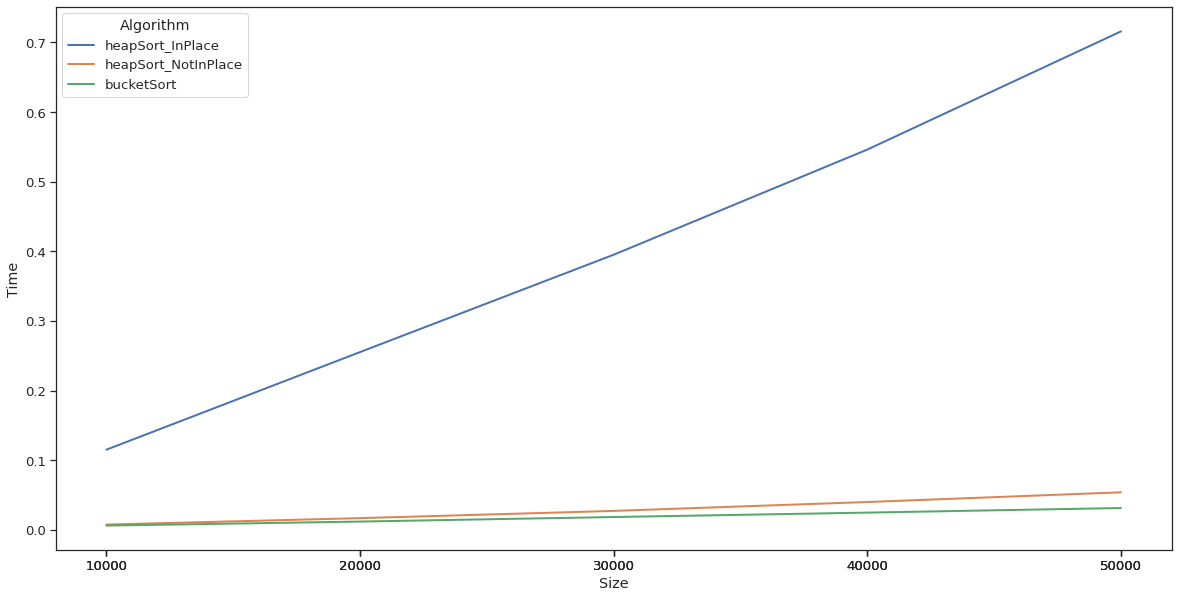

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

##Defines font size and line width
sns.set(font_scale=1.2, style="ticks", rc={"lines.linewidth": 2})

##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]

g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
#g.set_yscale('log') #escala logartimca, mais indicada quando a diferença entre os algoritimos comparados são muito distantes ou muito perto.
g.set(xticks=[i for i in df.Size])
plt.show()